# Electronic Store's Sales Analysis

#### Import Necessary Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Merging 12 months of sales data into a single file

In [90]:
import os

In [91]:
os.getcwd()

'/Users/sunnycao/Desktop/Project/Python/Sales Analysis '

In [92]:
url = '/Users/sunnycao/Desktop/Project/Python/Sales Analysis /SalesAnalysis/Sales_Data/'

In [93]:
files = os.listdir(url)

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(url+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv',index=False)

#### Read updated dataframes

In [94]:
all_data = pd.read_csv('all_data.csv')
all_data.sort_values(by = 'Order Date').head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
143792,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
144602,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
145955,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
146609,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
145962,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


##### Clean Up the data

In [95]:
# Find Nan data
for col in all_data.columns:
    missing = np.mean(all_data[col].isnull())
    print('{}: {}%'.format(col,missing))

Order ID: 0.002916778164302917%
Product: 0.002916778164302917%
Quantity Ordered: 0.002916778164302917%
Price Each: 0.002916778164302917%
Order Date: 0.002916778164302917%
Purchase Address: 0.002916778164302917%


In [96]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [97]:
all_data=all_data.dropna(how='all')

In [98]:
for col in all_data.columns:
    missing = np.mean(all_data[col].isnull())
    print('{}: {}%'.format(col,missing))

Order ID: 0.0%
Product: 0.0%
Quantity Ordered: 0.0%
Price Each: 0.0%
Order Date: 0.0%
Purchase Address: 0.0%


##### Add additional columns for further use

In [99]:
# Add Month column
all_data['Month']= all_data['Order Date'].str[:2]
all_data['Month']= all_data['Month'].astype('int')
all_data

ValueError: invalid literal for int() with base 10: 'Or'

In [144]:
# Add a city column, get both city and state to aviod duplicate names of cities
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


##### Find 'Or' and delete it

In [100]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [101]:
# Change type of Month column
all_data['Month']= all_data['Month'].astype('int')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


### 1. What was the best month for sales? How much was earned that month?

In [102]:
# Add Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

TypeError: can't multiply sequence by non-int of type 'str'

##### Convert columns to the correct type

In [103]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [104]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


In [105]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [109]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


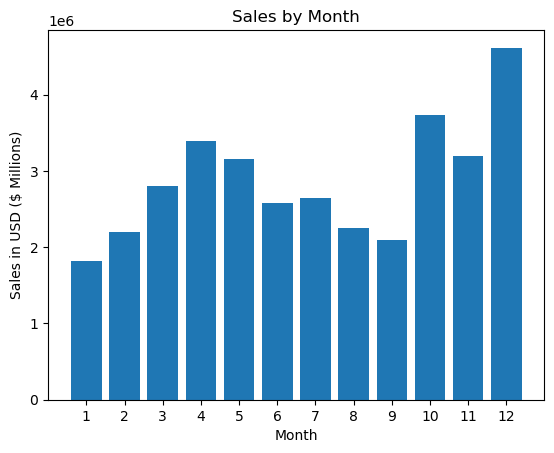

In [124]:
plt.bar(np.arange(1,13),results['Sales'])

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($ Millions)')
plt.xticks(np.arange(1,13))
plt.xlim(0)
plt.show()

In [ ]:
# December is the best month of sales because of holiday seasons in US, 
# The total earning rocket to 4.6 million dollars!

### 2. What city has the highest sales?

In [155]:
Cities = all_data.groupby('City').sum()
Cities.sort_values('Sales',ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


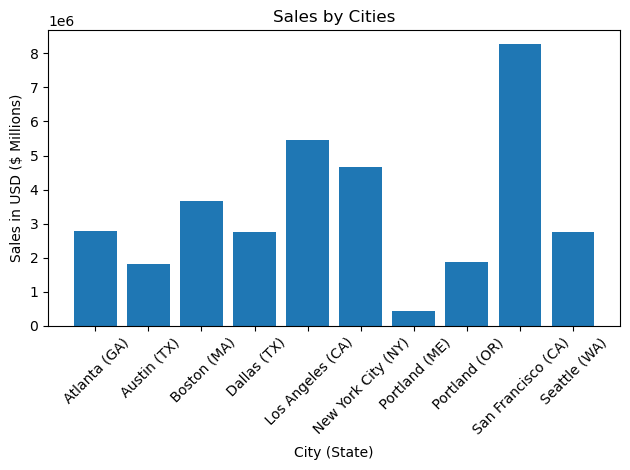

In [153]:
plt.bar(Cities.index,Cities['Sales'])
plt.xticks(rotation=45)
plt.title('Sales by Cities')
plt.xlabel('City (State)')
plt.ylabel('Sales in USD ($ Millions)')
plt.tight_layout()

In [ ]:
# San Francisco ranked the 1st place in sales
# The Silicon Valley located in San Francisco, huge demands for electronic instruments
# People with higher income level try to experience cutting edge technology

### 3. What time should we display advertisments to maximize likelihood of customer's buying product?

In [157]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [159]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,35


In [165]:
H = all_data.groupby('Hour').count()
H.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


Text(0, 0.5, 'Number of Orders')

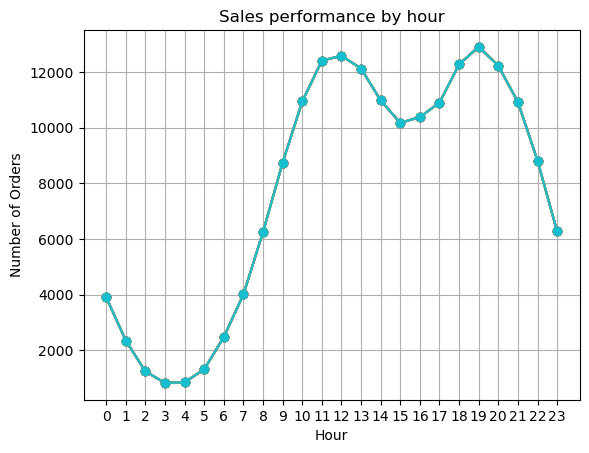

In [174]:
plt.plot(H.index,H,marker='o');
plt.xticks(H.index);
plt.grid()
plt.title('Sales performance by hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

In [ ]:
# Recommendation time is around 11-12 AM or 7PM

### 4. What products are most often sold together?

In [178]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

/var/folders/yn/knv6g3vd78x7vw83gr_5fk8r0000gn/T/ipykernel_4887/4038685202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [182]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
# Bundling sales of iphone or Google Phone and lighting charging cable is the most attractive promotion method

### 5. What product sold the most ? Why do you think it sold the most?

In [184]:
product_group = all_data.groupby('Product').sum()['Quantity Ordered']
product_group

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Number of Quantity Ordered')

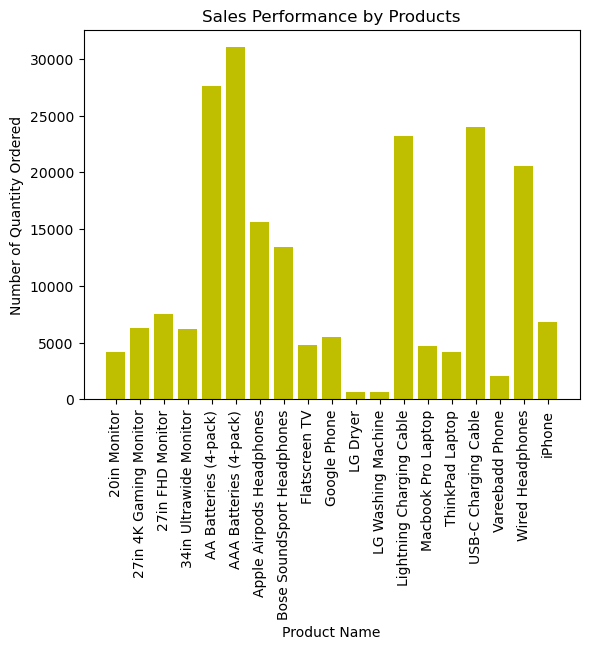

In [193]:
plt.bar(product_group.index,product_group,color='y')
plt.xticks(rotation=90);
plt.title('Sales Performance by Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Quantity Ordered')

#### Twinx chart to figure out relationship between Quantity Ordered & Prices

<Figure size 1600x900 with 0 Axes>

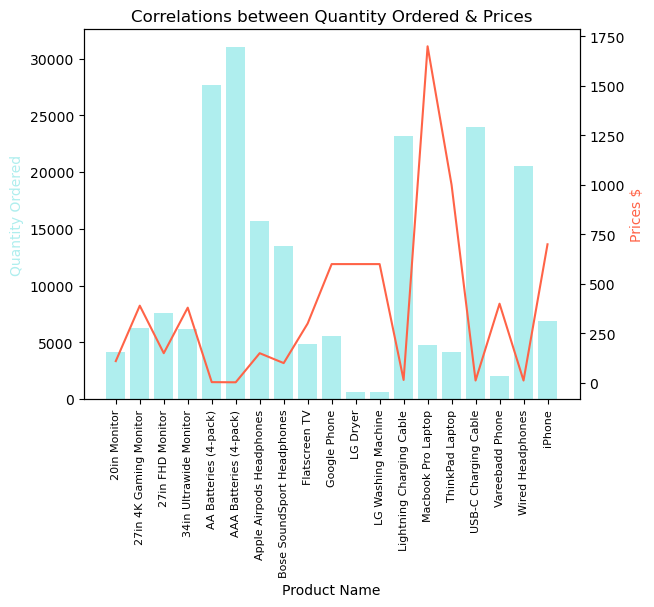

In [223]:
prices = all_data.groupby('Product').mean()['Price Each']
fig = plt.figure(figsize=(16,9))
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_group.index,product_group,color='paleturquoise')
ax2.plot(product_group.index,prices,color = 'tomato')

for tl in ax1.get_xticklabels():
    tl.set_rotation(90)
    tl.set_fontsize(8)
    
ax1.set_ylabel('Quantity Ordered',c='paleturquoise')
ax2.set_ylabel('Prices $',c='tomato')
ax1.set_xlabel('Product Name')
plt.title('Correlations between Quantity Ordered & Prices');

In [ ]:
# AAA Batteries & AAatteries sold the most because of its utility function and cheap price 
# The negative correlations between quantity ordered and prices, the prices turn up and orders turn down as normal trend
# For some particular products like Macbook Pro Laptop, its quantity higher than some of other products while its price is is the highest,
# this is may because people are now expect to experience new technology and value the perfomance of products when they consume